## Project name

**Objective:**

### Data Load

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
file_path = '../data/bank.csv'
df = pd.read_csv(file_path, sep=';')

**Data Check**

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [23]:
print("--- Data Types and Missing Values ---\n")
df.info()

--- Data Types and Missing Values ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [24]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [25]:
# handling unknown values
print("--- Columns with 'unknown' values ---\n")
for col in df.columns:
    if 'unknown' in df[col].unique():
        print(f"'{col}': {df[col].value_counts()['unknown']} unknown values")

# replace 'unknown' with NaN
print("\n\n--- After replacing 'unknown' with NaN ---\n")
df.replace('unknown', np.nan, inplace=True)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f"'{col}': {df[col].isnull().sum()} missing values")

--- Columns with 'unknown' values ---

'job': 38 unknown values
'education': 187 unknown values
'contact': 1324 unknown values
'poutcome': 3705 unknown values


--- After replacing 'unknown' with NaN ---

'job': 38 missing values
'education': 187 missing values
'contact': 1324 missing values
'poutcome': 3705 missing values


In [7]:
# missing values percentage
missing_pct = df.isnull().mean() * 100
print("--- Missing Values Percentage ---\n")

for col, pct in missing_pct.items():
    if pct > 0:
        print(f"'{col}': {pct:.2f}% missing values")


--- Missing Values Percentage ---

'job': 0.84% missing values
'education': 4.14% missing values
'contact': 29.29% missing values
'poutcome': 81.95% missing values


*A quick initial plot showing variables with missing values*

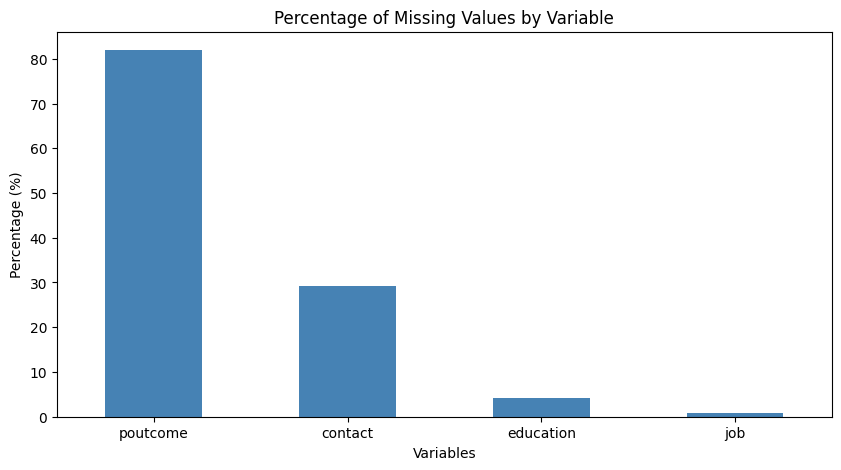

In [8]:
# missing values percentage 
missing_pct[missing_pct > 0].sort_values(ascending=False).plot(kind='bar', 
                                                               figsize=(10, 5), 
                                                               color='steelblue')
plt.title('Percentage of Missing Values by Variable')
plt.ylabel('Percentage (%)')
plt.xlabel('Variables')
plt.xticks(rotation=0)
plt.show()

### Imputation

In this section, we will conduct a brief exploratory data analysis for each variable containing missing values. The primary goal of this initial EDA is to select and justify the most appropriate imputation strategy for each variable.

***'job' variable***

Quick EDA on 'job' variable to determine imputation method consists of two parts. First, we check if there is any particular pattern or correlation between job type missingness and education level. Then we check the most common job type.

--- Proportion of Education Levels by Missing Job Info ---

education    primary  secondary  tertiary
job_missing                              
False          15.56      53.31     31.13
True           30.43      34.78     34.78



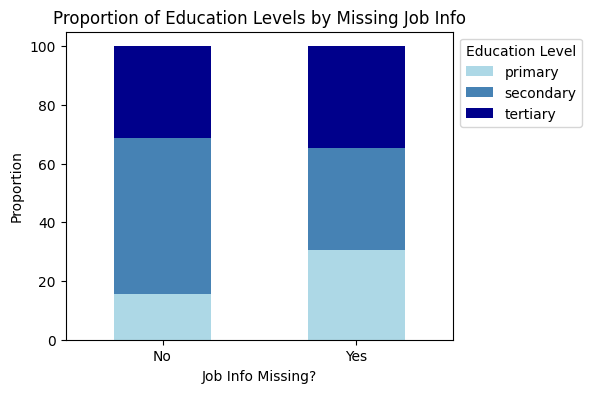

In [9]:
# investigate education level of observations with missing values under 'job' variable 
df['job_missing'] = df['job'].isnull()
props = df.groupby('job_missing')['education'].value_counts(normalize=True).unstack()*100
print("--- Proportion of Education Levels by Missing Job Info ---\n")
print(f"{props.round(2)}\n")
props.plot(kind='bar', 
           stacked=True, 
           color=['lightblue','steelblue','darkblue'],
           figsize=(5, 4))
plt.title('Proportion of Education Levels by Missing Job Info')
plt.xlabel('Job Info Missing?')
plt.ylabel('Proportion')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))
plt.show()

Clients with missing job information are slightly more likey to have a tertiary education while having less secondary education. Despite this minor difference, the extremely small number of missing values (0.84%) makes a simple **mode imputation** the most practical and defensible choice.

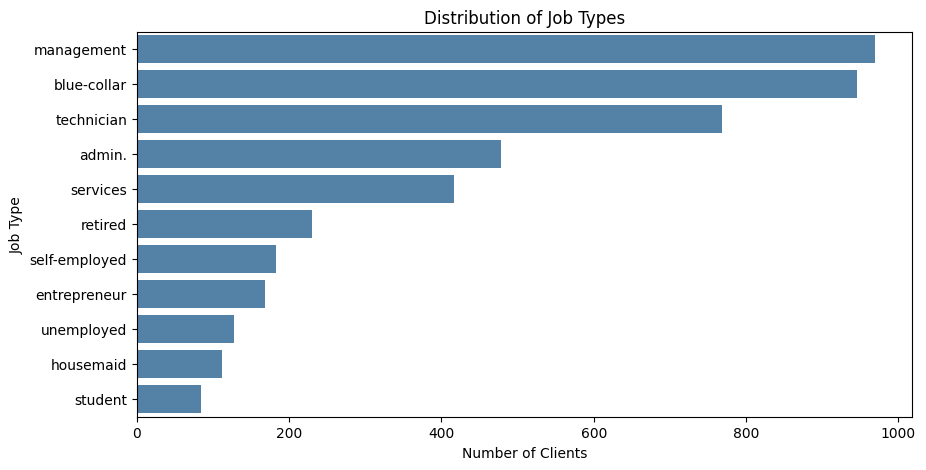

In [10]:
# 'job' variable horizontal bar plot
plt.figure(figsize=(10,5))
sns.countplot(y='job', 
              data=df, 
              order=df['job'].value_counts().index, 
              color='steelblue')
plt.title('Distribution of Job Types')
plt.xlabel('Number of Clients')
plt.ylabel('Job Type')
plt.show()

In [11]:
# 'job' variable - mode imputation
job_mode = df['job'].mode()[0]
df['job'] = df['job'].fillna(job_mode)
print(f"Total missing 'job' values after imputation: {df['job'].isnull().sum()}")
print(f"Missing 'job' values filled with mode: {job_mode}\n")

Total missing 'job' values after imputation: 0
Missing 'job' values filled with mode: management



***'education' variable***

Quick EDA on 'education' variable with hypothesis that person's education level is related to his/her job type. We create a normalized stacked bar chart to validate our hypothesis. If each bar has different proportion of colors, it proves a strong association between job type and education level.

--- Proportion of Education Levels by Job Type ---

education      primary  secondary  tertiary
job                                        
admin.            3.69      85.25     11.06
blue-collar      40.77      57.90      1.33
entrepreneur     16.56      36.94     46.50
housemaid        53.27      26.17     20.56
management        4.77      12.85     82.38
retired          37.04      48.61     14.35
self-employed     8.38      42.46     49.16
services          6.19      89.85      3.96
student           2.94      69.12     27.94
technician        2.01      69.71     28.28
unemployed       20.63      53.97     25.40



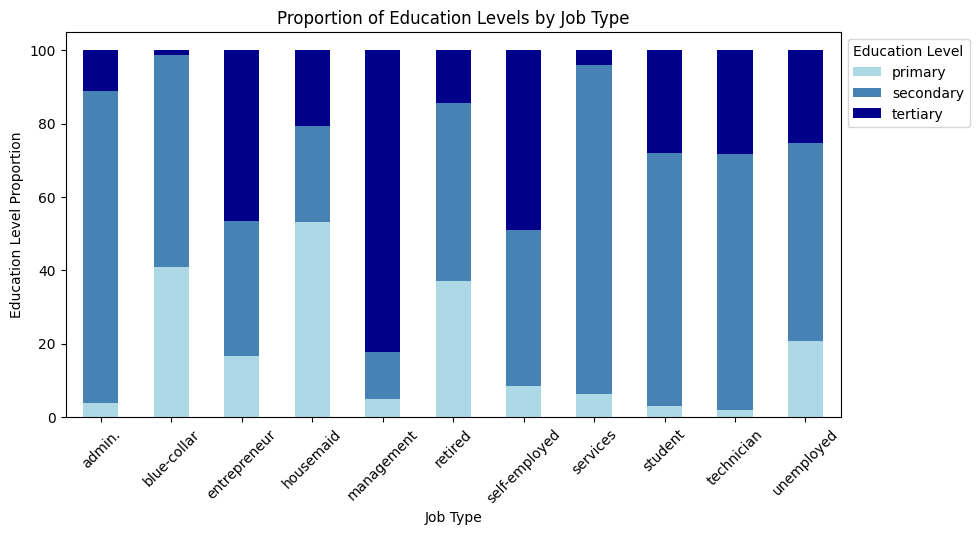

In [12]:
# investigate correlation between 'job' and 'education' variables
props = df.groupby('job')['education'].value_counts(normalize=True).unstack()*100
print("--- Proportion of Education Levels by Job Type ---\n")
print(f"{props.round(2)}\n")
props.plot(kind='bar',
           stacked=True,
           color=['lightblue','steelblue','darkblue'],
           figsize=(10, 5))
plt.title('Proportion of Education Levels by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Education Level Proportion')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1, 1))
plt.show()

'entrepreneur', 'management', and 'self-employed' jobs are dominated by clients with tertiary education while 'blue-collar' and 'services' jobs are overwhelmingly composed of clients with secondary education. Each bar has a unique color pattern, proving that client's job gives a strong clue about their likely education level. Therefore, **missing education values will be assigned the most common education values within each job type.**

In [13]:
# 'education' variable - conditional mode imputation based on 'job'
edu_mode = df.groupby('job')['education'].apply(lambda x: x.mode()[0])
print("--- Education Mode by Job Type ---\n")
print(edu_mode)

--- Education Mode by Job Type ---

job
admin.           secondary
blue-collar      secondary
entrepreneur      tertiary
housemaid          primary
management        tertiary
retired          secondary
self-employed     tertiary
services         secondary
student          secondary
technician       secondary
unemployed       secondary
Name: education, dtype: object


In [14]:
job_edu_df = edu_mode.reset_index()
job_edu_df.columns = ['job', 'education_mode']
merged_df = pd.merge(df, job_edu_df, on='job', how='left')
merged_df['education'] = merged_df['education'].fillna(merged_df['education_mode'])
merged_df = merged_df.drop(columns=['education_mode'])
print(f"Total missing 'education' values after imputation: {merged_df['education'].isnull().sum()}")
print(f"Missing 'education' values filled based on each job's education mode.\n")

# delete temporary column
df = merged_df
del df['job_missing']


Total missing 'education' values after imputation: 0
Missing 'education' values filled based on each job's education mode.



***'contact' variable***

'Contact' variable has 29.3% missing values which is too high for a simple imputation. We check if the missing values in the 'contact' variable hold any meaning by formulating the hypothesis that the subscription success rate for clients with a missing contact type is different from the rates for clients with other contact types. If a group with missing values shows different success rate from other contact types, we will **treat missings values as a distinct contact type.**

--- Subscription Success Rate by Contact Type ---

y             no    yes
contact                
telephone  85.38  14.62
cellular   85.64  14.36
missing    95.39   4.61



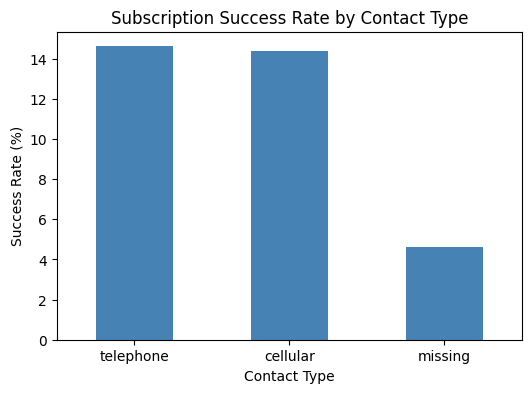

In [15]:
# investigate subscription success rate by 'contact' type
temp_df = df.copy()
temp_df['contact'] = temp_df['contact'].fillna('missing')
contact_success = temp_df.groupby('contact')['y'].value_counts(normalize=True).unstack().sort_values(by='yes', ascending=False)*100
print("--- Subscription Success Rate by Contact Type ---\n")
print(f"{contact_success.round(2)}\n")

contact_success['yes'].plot(kind='bar',
                            figsize=(6, 4),
                            color='steelblue')
plt.title('Subscription Success Rate by Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=0)
plt.show()

There is a noticeable difference in the subscription success rate between the two known contact types and the group where contact information was not recorded. This confirms that clients with an unknown contact type behaves differently, validating the strategy of treating these values as a distinct third contact type, which will be label **'unspecified.'**

In [16]:
# 'contact' variable - fill with 'unspecified'
df['contact'] = df['contact'].fillna('unspecified')
print(f"Total missing 'contact' values after imputation: {df['contact'].isnull().sum()}")
print(f"Final contact types: {df['contact'].unique()}\n")

Total missing 'contact' values after imputation: 0
Final contact types: ['cellular' 'unspecified' 'telephone']



*'poutcome' variable*

The 'poutcome' variable, which describes the result of the previous marketing campaign, is categorized as 'unknown' for over 80% of clients. We hypothesize that this is not a random data error. Instead, we believe this large group will have a fundamentally different subscription behavior than those with a known outcome (success, failure, or other). Our EDA will test this hypothesis to validate **treating this 'unknown outcome' group as a distinct category.**

--- Subscription Success Rate by Previous Campaign Outcome ---

y            no    yes
poutcome              
success   35.66  64.34
other     80.71  19.29
failure   87.14  12.86
missing   90.90   9.10



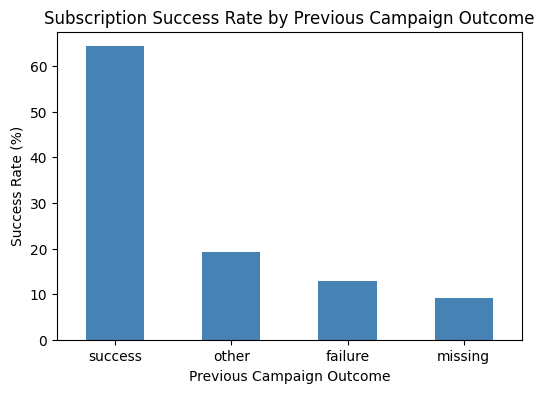

In [17]:
# investigate success rate by exposure to previous campaign
temp_df = df.copy()
temp_df['poutcome'] = temp_df['poutcome'].fillna('missing')
success_rate = temp_df.groupby('poutcome')['y'].value_counts(normalize=True).unstack().sort_values(by='yes', ascending=False)*100
print("--- Subscription Success Rate by Previous Campaign Outcome ---\n")
print(f"{(success_rate).round(2)}\n")

success_rate['yes'].plot(kind='bar',
                         figsize=(6, 4),
                         color='steelblue')
plt.title('Subscription Success Rate by Previous Campaign Outcome')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=0)
plt.show()

Over 60% of clients with a previous 'success' subscribed again, making past success a powerful predictor. Furthermore, the 'missing' group has a distinct success rate of about 9.10%, different from the other known categories. It confirms our hypothesis that this group exhibits unique behavior. Therefore, we will treat 'missing' group as a fourth category and label it as **'unknown_outcome'.**

In [18]:
# 'poutcome' variable - fill with 'unknown_outcome'
df['poutcome'] = df['poutcome'].fillna('unknown_outcome')
print("--- Final Missing Values Check ---\n")
print(f"Total missing 'contact' values after imputation: {df['poutcome'].isnull().sum()}")
print(f"Final poutcome types: {df['poutcome'].unique()}\n")

--- Final Missing Values Check ---

Total missing 'contact' values after imputation: 0
Final poutcome types: ['unknown_outcome' 'failure' 'other' 'success']



*Imputation Conclusion*

In [19]:
# final imputation check
print("--- Final Missing Values Check ---\n")
print(df.isnull().sum())

--- Final Missing Values Check ---

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


At the end of this imputation process, the dataset is 100% free of missing values. All cleaning decisions were justified using exploratory data analysis. The data is now ready for the main EDA phase.